# Automating Reviews in Medicine

In [27]:
clinical = read.csv("clinical_trial.csv", stringsAsFactors=F, encoding="latin1" )

In [28]:
# #Maximum number of characters
max(nchar(clinical$abstract))

[1] 3708

In [29]:
clinical

,title,abstract,trial
1,"Treatment of Hodgkin's disease and other cancers with 1,3-bis(2-chloroethyl)-1-nitrosourea (BCNU; NSC-409962).",,1
2,Cell mediated immune status in malignancy--pretherapy and post-therapy assessment.,"Twenty-eight cases of malignancies of different kinds were studied to assess T-cell activity and population before and after institution of therapy. Fifteen cases were diagnosed as non-metastasising squamous cell carcinoma of larynx, pharynx, laryngopharynx, hypopharynx and tonsils. Seven cases were non-metastasising infiltrating duct carcinoma of breast and 6 cases were non-Hodgkin's lymphoma (NHL). It was observed that 3 out of 15 cases (20%) of squamous cell carcinoma cases were Mantoux test (MT) negative with a T-cell population of less than 40%, 2 out of 7 cases (28.6%) of infiltrating duct carcinoma of breast were MT negative with a T-cell population of less than 40% and 3 out of 6 cases (50%) of NHL were MT negative with a T-cell population of less than 40%. The normal controls, consisting of apparently normal healthy adults, had a T-cell population of more than 40% and were all MT positive. The patients who showed a negative skin test and a T-cell population less than 40% were further subjected to assessment of T-cell population and activity after appropriate therapy, and clinical cure of the disease. It was observed that 2 out of 3 cases (66.66%) of squamous cell carcinomas, 2 out of 2 cases (100%) of adenocarcinomas and one out of 3 cases (33.33%) of NHL showed positive conversion with a T-cell population of more than 40%.",0
3,Neoadjuvant vinorelbine-capecitabine versus docetaxel-doxorubicin-cyclophosphamide in early nonresponsive breast cancer: phase III randomized GeparTrio trial.,"BACKGROUND: Among breast cancer patients, nonresponse to initial neoadjuvant chemotherapy is associated with unfavorable outcome. We compared the response of nonresponding patients who continued the same treatment with that of patients who switched to a well-tolerated non-cross-resistant regimen. METHODS: Previously untreated breast cancer patients received two 3-week cycles of docetaxel at 75 mg/m(2), doxorubicin at 50 mg/m(2), and cyclophosphamide at 500 mg/m(2) per day (TAC). Patients whose tumors did not decrease in size by at least 50% were randomly assigned to four additional cycles of TAC or to four cycles of vinorelbine at 25 mg/m(2) and capecitabine at 2000 mg/m(2) (NX). The outcome was sonographic response, defined as a reduction in the product of the two largest perpendicular diameters by at least 50%. A difference of 10% or less in the sonographic response qualified as noninferiority of the NX treatment. Pathological complete response was defined as no invasive or in situ residual tumor masses in the breast and lymph nodes. Toxic effects were assessed. All statistical tests were two-sided. RESULTS: Of 2090 patients enrolled in the GeparTrio study, 622 (29.8%) who did not respond to two initial cycles of TAC were randomly assigned to an additional four cycles of TAC (n = 321) or to four cycles of NX (n = 301). Sonographic response rate was 50.5% for the TAC arm and 51.2% for the NX arm. The difference of 0.7% (95% confidence interval = -7.1% to 8.5%) demonstrated noninferiority of NX (P = .008). Similar numbers of patients in both arms received breast-conserving surgery (184 [57.3%] in the TAC arm vs 180 [59.8%] in the NX arm) and had a pathological complete response (5.3% vs 6.0%). Fewer patients in the NX arm than in the TAC arm had hematologic toxic effects, mucositis, infections, and nail changes, but more had hand-foot syndrome and sensory neuropathy. CONCLUSION: Pathological complete responses to both regimens were marginal. Among patients who did not respond to the initial neoadjuvant TAC treatment, similar efficacy but better tolerability was observed by switching to NX than continuing with TAC.",1
4,"Randomized phase 3 trial of fluorouracil, epirubicin, and cyclophosphamide alone or followed by 

In [30]:
nrow(subset(clinical, abstract == ""))

[1] 112

In [31]:
min(nchar(clinical$title))

[1] 28

In [32]:
subset(clinical, nchar(clinical$title) == 28)

,title,abstract,trial
1258,A decade of letrozole: FACE.,"Third-generation nonsteroidal aromatase inhibitors (AIs), letrozole and anastrozole, are superior to tamoxifen as initial therapy for early breast cancer but have not been directly compared in a head-to-head adjuvant trial. Cumulative evidence suggests that AIs are not equivalent in terms of potency of estrogen suppression and that there may be differences in clinical efficacy. Thus, with no data from head-to-head comparisons of the AIs as adjuvant therapy yet available, the question of whether there are efficacy differences between the AIs remains. To help answer this question, the Femara versus Anastrozole Clinical Evaluation (FACE) is a phase IIIb open-label, randomized, multicenter trial designed to test whether letrozole or anastrozole has superior efficacy as adjuvant treatment of postmenopausal women with hormone receptor (HR)- and lymph node-positive breast cancer. Eligible patients (target accrual, N=4,000) are randomized to receive either letrozole 2.5 mg or anastrozole 1 mg daily for up to 5 years. The primary objective is to compare disease-free survival at 5 years. Secondary end points include safety, overall survival, time to distant metastases, and time to contralateral breast cancer. The FACE trial will determine whether or not letrozole offers a greater clinical benefit to postmenopausal women with HR+ early breast cancer at increased risk of early recurrence compared with anastrozole.",0


In [33]:
# #ANSWER - A decade of letrozole: FACE.

In [34]:
# #Text Mining Module
library(tm)

In [35]:
corpusTitle = Corpus(VectorSource(clinical$title))

In [36]:
corpusAbstract = Corpus(VectorSource(clinical$abstract))

In [37]:
# #LOWERCASE
corpusTitle = tm_map(corpusTitle, tolower)
corpusAbstract = tm_map(corpusAbstract, tolower)

In [38]:
# #Plaintext
corpusTitle = tm_map(corpusTitle, PlainTextDocument)
corpusAbstract = tm_map(corpusAbstract, PlainTextDocument)

In [39]:
corpusTitle = tm_map(corpusTitle, removePunctuation)
corpusAbstract = tm_map(corpusAbstract, removePunctuation)

In [40]:
# #REMOVE STOPWORDS
corpusTitle = tm_map(corpusTitle, removeWords, stopwords('english'))
corpusAbstract = tm_map(corpusAbstract, removeWords, stopwords('english'))

In [41]:
# #STEMMING
corpusTitle = tm_map(corpusTitle, stemDocument)
corpusAbstract = tm_map(corpusAbstract, stemDocument)

In [42]:
dtmTitle = DocumentTermMatrix(corpusTitle)
dtmAbstract = DocumentTermMatrix(corpusAbstract)

In [43]:
sparseTitle = removeSparseTerms(dtmTitle, 0.95)
sparseAbstract = removeSparseTerms(dtmAbstract, 0.95)

In [44]:
dtmTitle = as.data.frame(as.matrix(sparseTitle))
dtmAbstract = as.data.frame(as.matrix(sparseAbstract))

In [45]:
nrow(dtmTitle)

[1] 1860

In [46]:
nrow(dtmAbstract)

[1] 1860

In [47]:
dtmTitle

,adjuv,advanc,breast,cancer,chemotherapi,clinic,combin,compar,cyclophosphamid,docetaxel,...,randomis,respons,result,studi,tamoxifen,therapi,treatment,trial,versus,women
character(0),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
character(0).1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0).2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
character(0).3,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
character(0).4,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
character(0).5,0,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
character(0).6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0).7,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,2,0,0,1,1,1
character(0).8,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
character(0).9,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [48]:
dtmAbstract

,0001,001,005,100,500,5fluorouracil,accord,achiev,activ,addit,...,versus,vomit,week,well,wherea,whether,within,without,women,year
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0).1,0,0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
character(0).2,0,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
character(0).3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
character(0).4,0,0,0,0,2,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
character(0).5,7,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
character(0).6,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
character(0).7,0,1,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,2,0,2,3
character(0).8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,3,3
character(0).9,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [49]:
which.max(colSums(dtmAbstract))

patient 
    212

In [50]:
# #3

In [51]:
colnames(dtmTitle) = paste0("T", colnames(dtmTitle))

colnames(dtmAbstract) = paste0("A", colnames(dtmAbstract))

In [52]:
dtmTitle

,Tadjuv,Tadvanc,Tbreast,Tcancer,Tchemotherapi,Tclinic,Tcombin,Tcompar,Tcyclophosphamid,Tdocetaxel,...,Trandomis,Trespons,Tresult,Tstudi,Ttamoxifen,Ttherapi,Ttreatment,Ttrial,Tversus,Twomen
character(0),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
character(0).1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0).2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
character(0).3,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
character(0).4,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
character(0).5,0,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
character(0).6,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0).7,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,2,0,0,1,1,1
character(0).8,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
character(0).9,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [53]:
dtm = cbind(dtmTitle, dtmAbstract)

Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,25

In [54]:
ncol(dtm)

[1] 366

In [55]:
library(caTools)
set.seed(144)

Warning message:
: package 'caTools' was built under R version 3.2.5

In [58]:
# #Splitting into TRAIN and TEST
dtm$trial <- clinical$trial
split = sample.split(dtm$trial, SplitRatio=0.7)
train = subset(dtm, split==T)
test = subset(dtm, split==F)

In [59]:
table(train$trial)


  0   1 
730 572 

In [61]:
730/(572+730)

[1] 0.5606759

In [62]:
# #CART
library(rpart)
library(rpart.plot)

Warning message:
: package 'rpart' was built under R version 3.2.5Warning message:
: package 'rpart.plot' was built under R version 3.2.5

In [63]:
treeModel = rpart(trial ~., data=train, method="class")
treePredicts = predict(treeModel, newdata=test)

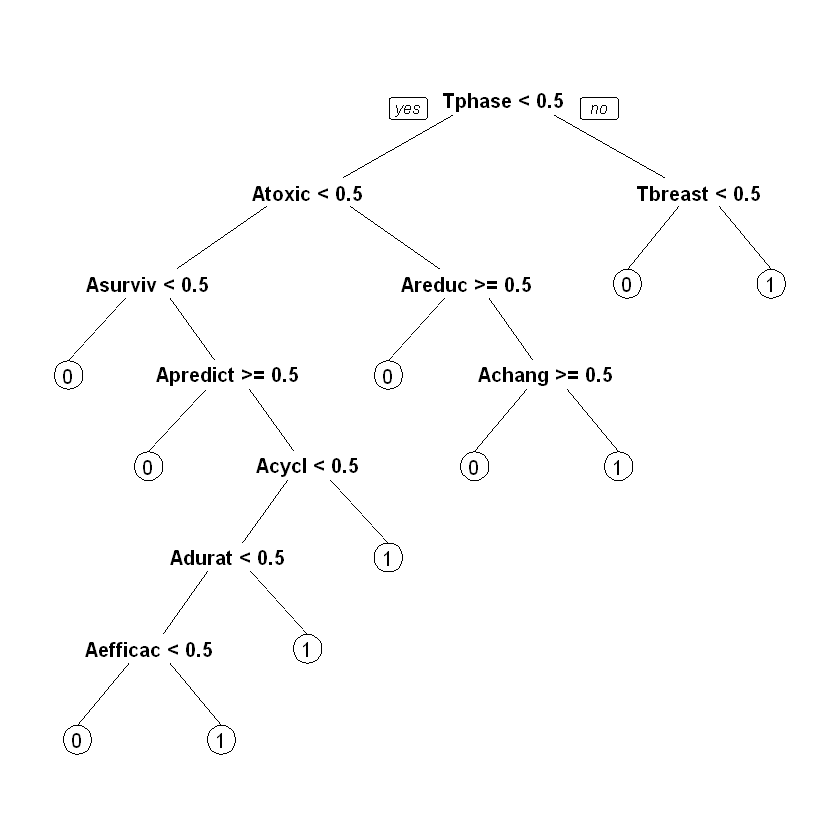

In [64]:
prp(treeModel)

In [65]:
max(predict(treeModel)[,2])

[1] 0.8718861

In [66]:
table(train$trial, predict(treeModel)[,2] >= .5)

   
    FALSE TRUE
  0   631   99
  1   131  441

In [67]:
table(test$trial, treePredicts[,2] >= .5)

   
    FALSE TRUE
  0   261   52
  1    83  162

In [68]:
library(ROCR)
pred = prediction(treePredicts[,2], test$trial)
perf = performance(pred, "tpr", "fpr")
as.numeric(performance(pred, "auc")@y.values)

Warning message:
: package 'ROCR' was built under R version 3.2.5Loading required package: gplots
Warning message:
: package 'gplots' was built under R version 3.2.5
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



[1] 0.8371063